<a href="https://colab.research.google.com/github/insightcampus/202008-youth-bigdata/blob/master/bokyoung/%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%8B%A4%EC%8A%B51_LSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
docs=['바나나 사과 포도 포도',
      '사과 포도',
      '포도 바나나',
      '짜장면 짬뽕 탕수육',
      '볶음밥 탕수육',
      '짜장면 짬뽕',
      '된장찌개 김치찌개 김치 비빔밥',
      '김치 된장 비빔밥',
      '비빔밥 김치',
      '사과 볶음밥 김치 된장']

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
n_topics= 3

#TF-IDF선언
tfidf_vect = TfidfVectorizer()
tfidf= tfidf_vect.fit_transform(docs)

#SVD 선언
svd = TruncatedSVD(n_components = n_topics)
u_sigma = svd.fit_transform(tfidf)
svd.components_

array([[ 0.39094311,  0.08663945,  0.2634605 ,  0.08663945,  0.31533599,
         0.1677167 ,  0.33012626,  0.42118555,  0.01907605,  0.01907605,
         0.05422822,  0.58747296],
       [ 0.49683512,  0.13720069,  0.26962551,  0.13720069, -0.29774469,
         0.10773075,  0.49275818, -0.18567019,  0.02131272,  0.02131272,
         0.04450862, -0.51222803],
       [-0.06285924, -0.02901254, -0.00762375, -0.02901254, -0.01957621,
         0.19210545, -0.09004258,  0.00851823,  0.60658392,  0.60658392,
         0.46061907, -0.02794911]])

In [3]:
vocab = tfidf_vect.get_feature_names()
n=3
for idx, topic in enumerate(svd.components_):
  print("Topic %d:" % (idx), [(vocab[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

Topic 0: [('포도', 0.58747), ('사과', 0.42119), ('김치', 0.39094)]
Topic 1: [('김치', 0.49684), ('비빔밥', 0.49276), ('된장', 0.26963)]
Topic 2: [('짬뽕', 0.60658), ('짜장면', 0.60658), ('탕수육', 0.46062)]


## 단어 백터 간의 상관관계

In [4]:
#단어 백터
for i in range(len(vocab)):
  print("{} : {}".format(vocab[i], svd.components_.T[i]))

김치 : [ 0.39094311  0.49683512 -0.06285924]
김치찌개 : [ 0.08663945  0.13720069 -0.02901254]
된장 : [ 0.2634605   0.26962551 -0.00762375]
된장찌개 : [ 0.08663945  0.13720069 -0.02901254]
바나나 : [ 0.31533599 -0.29774469 -0.01957621]
볶음밥 : [0.1677167  0.10773075 0.19210545]
비빔밥 : [ 0.33012626  0.49275818 -0.09004258]
사과 : [ 0.42118555 -0.18567019  0.00851823]
짜장면 : [0.01907605 0.02131272 0.60658392]
짬뽕 : [0.01907605 0.02131272 0.60658392]
탕수육 : [0.05422822 0.04450862 0.46061907]
포도 : [ 0.58747296 -0.51222803 -0.02794911]


In [5]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#코사인 유사도
def cosine_similarity(a,b):
  return dot(a,b)/(norm(a)*norm(b))

#코사인 유사도를 사용해 행렬의 유사도 구하기
def calc_similarity_matrix(vectors):
  n_word= len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word):
    # 위에서 정의한 코사인 유사도 사용
    for j in range(i, n_word):
      similarity_matrix[j,i] = cosine_similarity(vectors[i], vectors[j]).round(4)

  return similarity_matrix

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix) :
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
  plt.rcParams['figure.figsize']=[8,6]
  ax = sns.heatmap(uniform_data, mask=mask, 
                   annot=True, fmt=".2f", annot_kws={'size':8},
                   cmap='coolwarm')
  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
print(vocab)

['김치', '김치찌개', '된장', '된장찌개', '바나나', '볶음밥', '비빔밥', '사과', '짜장면', '짬뽕', '탕수육', '포도']


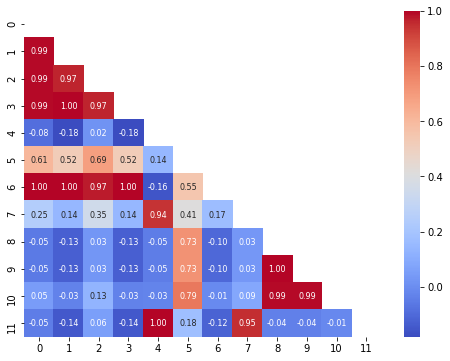

In [8]:
word_vectors = svd.components_.T
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

## 단어 백터 시각화

In [9]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters

In [11]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

In [12]:
from sklearn.manifold import TSNE
import numpy as np
vectors = word_vectors
labels = tfidf_vect.get_feature_names()
def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T= tsne.fit_transform(vectors)

  plt.figure(figsize=(10,6))
  plt.scatter(T[:,0], T[:,1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, T[:,0], T[:,1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0,0),
                 textcoords='offset points')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


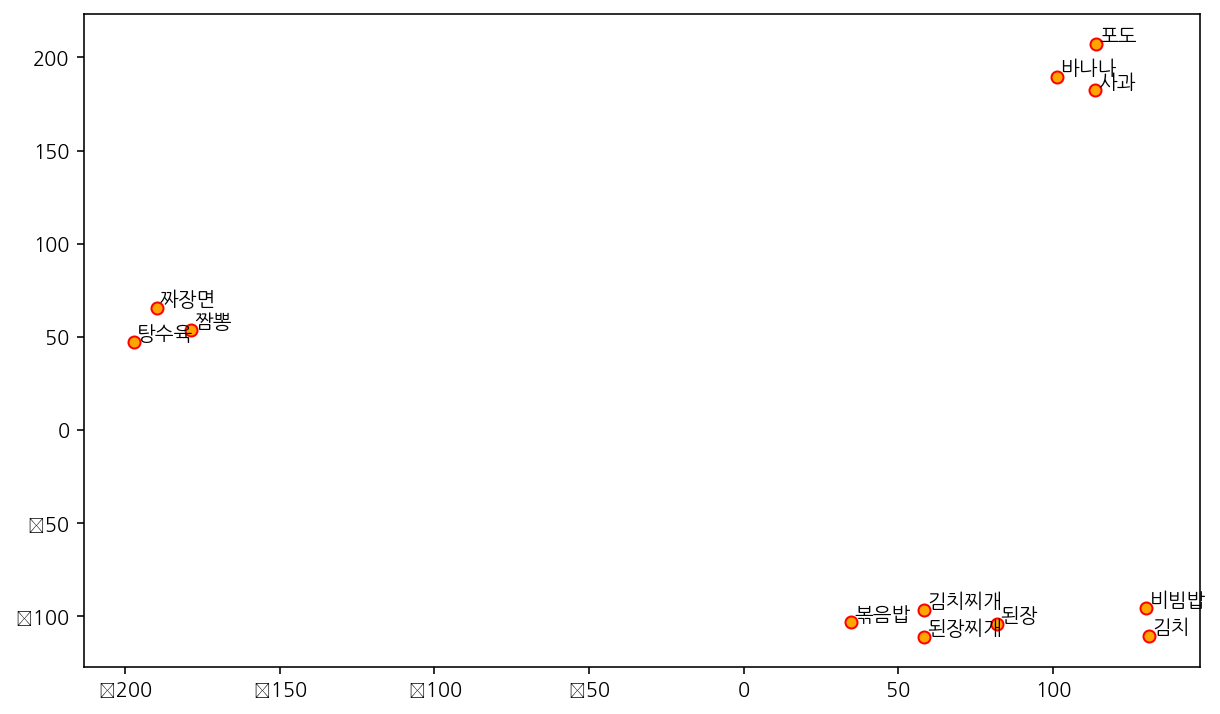

In [13]:
visualize_vectors(vectors, labels)